# Build a Simple RSI Trading Bot with Python

RSI stands for Relative Strength Index.
It’s a simple tool that measures how fast and strong the stock price is moving.
When RSI goes above 70, it usually means the stock is getting too expensive — and it might be time to sell.
When RSI drops below 30, it means the stock might be cheap — and it could be a good time to buy.

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Download Stock Data

In this step we needed some real stock data to work with. In this step we are going to download Apple’s stock price using the yfinance library. We tell it the stock symbol 'AAPL' and ask for the prices from January 1, 2022, to January 1, 2023. 

In [21]:
# Get real-world stock prices so we can calculate the RSI and Bild our Startegy
data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.879913,179.734962,174.653874,174.771805,104487900
2022-01-04,176.609619,179.793905,176.039592,179.489238,99310400
2022-01-05,171.911835,177.071549,171.636651,176.521181,94537600
2022-01-06,169.042068,172.285320,168.688259,169.730027,96904000
2022-01-07,169.209122,171.145244,168.088727,169.916741,86709100


### Step 3: Calculate RSI

In [31]:
# Function to calcluate RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss 
    return 100 - (100 / (1 + rs))
    data['RSI'] = calculate_rsi(data['Close'])

### Step 4: Create Buy/Sell Signals

In [35]:
data['Signal'] =  0
data.loc[data['RSI'] < 30, 'Signal'] = 1
data.loc[data['RSI'] > 70, 'Signal'] = -1
data['Position'] = data['Signal'].diff()

### Step 5: Plot RSI Strategy

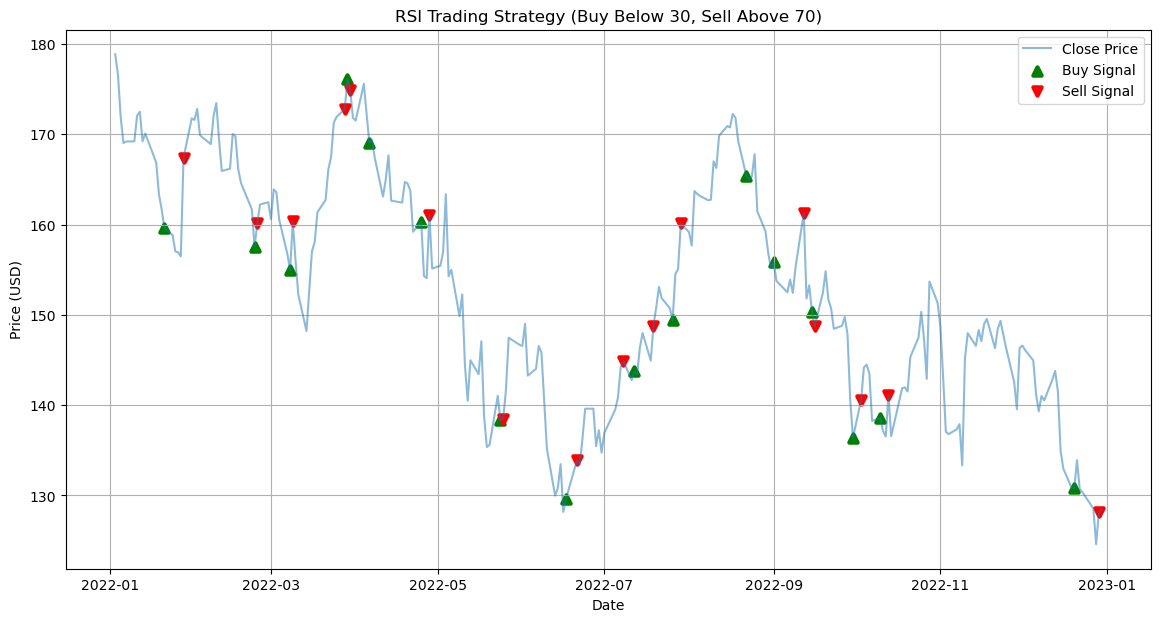

In [39]:
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.scatter(data.index[data['Position'] == 1],
            data['Close'][data['Position'] == 1],
            label='Buy Signal', marker='^', color='green', lw=3)
plt.scatter(data.index[data['Position'] == -1],
            data['Close'][data['Position'] == -1],
            label='Sell Signal', marker='v', color='red', lw=3)
plt.title('RSI Trading Strategy (Buy Below 30, Sell Above 70)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


### The End! 

Don't forget to Subscribe to my YouTube Channel: https://www.youtube.com/@datageekismyname